# Big Mart Sales Prediction

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

### Importing dataset

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##### Listing the categorial features
- Item_Identifier
- Item_Fat_Content
- Item_Type 
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling the missing values

##### Filling the NaN value of Item_weight with mean of that column

In [7]:
df['Item_Weight'].mean()

12.857645184136183

In [8]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### Filling the NaN value of Outlet_Size with mode of that column

In [10]:
mode_of_outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [11]:
missing_values = df['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [12]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [13]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Visualizing different columns

In [15]:
sns.set()

<Figure size 576x576 with 0 Axes>

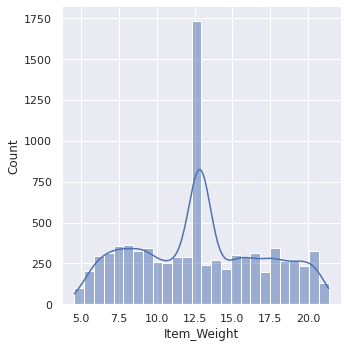

In [16]:
### Item weight distribution
plt.figure(figsize=(8, 8))
sns.displot(df.Item_Weight, kde=True)
plt.show()

<Figure size 576x576 with 0 Axes>

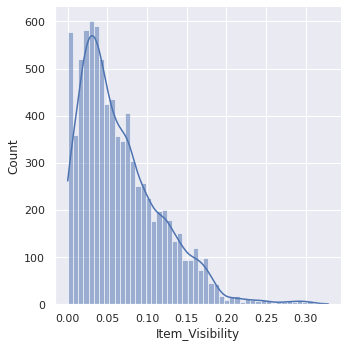

In [17]:
### Item visibility distribution
plt.figure(figsize=(8, 8))
sns.displot(df.Item_Visibility, kde=True)
plt.show()

<Figure size 576x576 with 0 Axes>

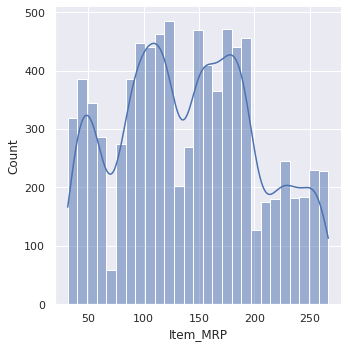

In [18]:
### Item MRP distribution
plt.figure(figsize=(8, 8))
sns.displot(df.Item_MRP, kde=True)
plt.show()

<Figure size 576x576 with 0 Axes>

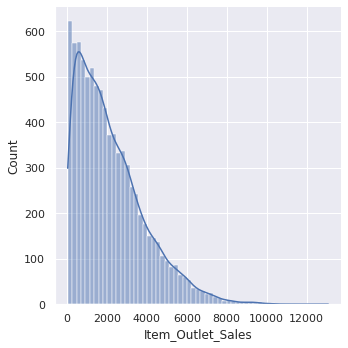

In [19]:
### Item Outlet Sales distribution
plt.figure(figsize=(8, 8))
sns.displot(df.Item_Outlet_Sales, kde=True)
plt.show()

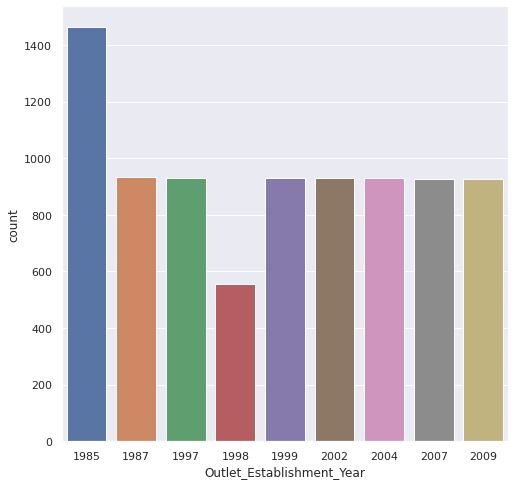

In [20]:
### Item Outlet Establishment Year distribution
plt.figure(figsize=(8, 8))
sns.countplot(df.Outlet_Establishment_Year)
plt.show()

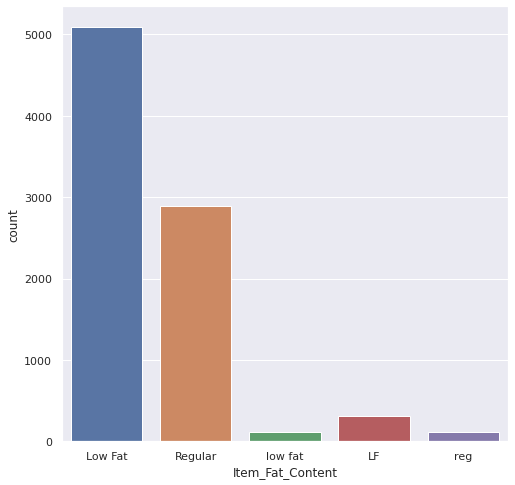

In [21]:
### Item Fat Content distribution
plt.figure(figsize=(8, 8))
sns.countplot(df.Item_Fat_Content)
plt.show()

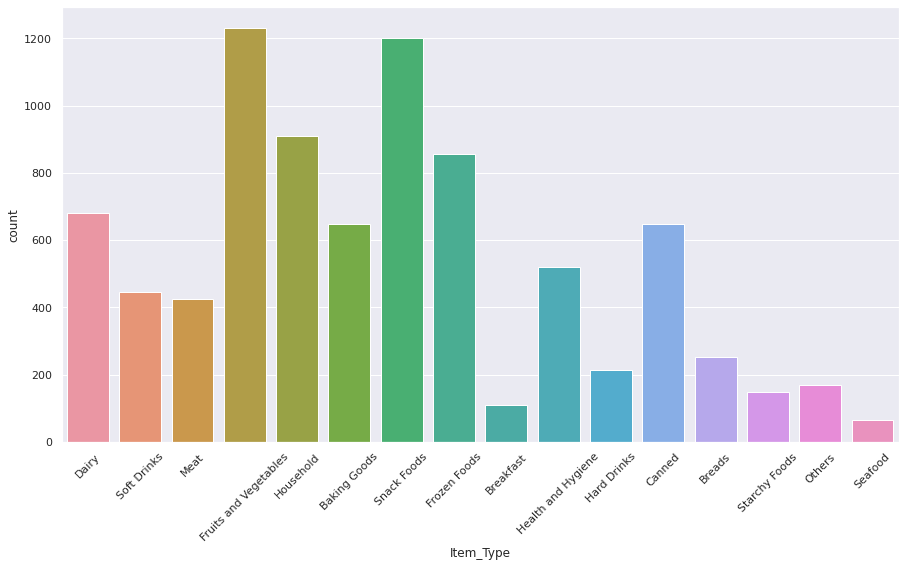

In [22]:
### Item type distribution
plt.figure(figsize=(15, 8))
sns.countplot(df.Item_Type)
plt.xticks(rotation=45)
plt.show()

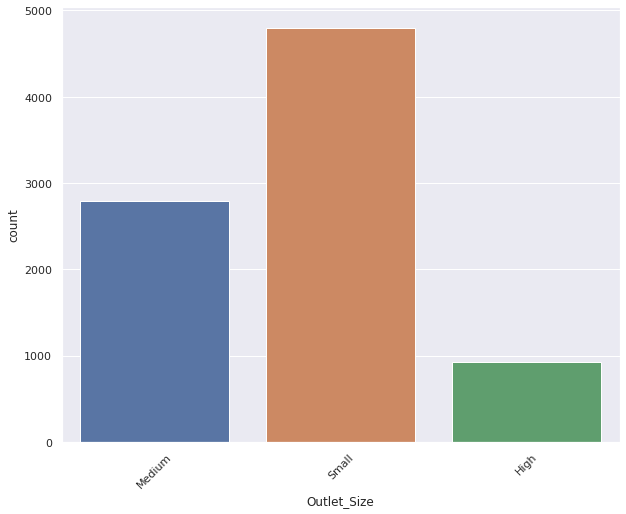

In [23]:
### Outlet Size distribution
plt.figure(figsize=(10, 8))
sns.countplot(df.Outlet_Size)
plt.xticks(rotation=45)
plt.show()

### Data Preprocessing

##### Since in item fat content column, same feature is of different name so we make them same

In [24]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
df.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

In [26]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Changing the categorial value to the numerical value

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorial_features = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for features in categorial_features:
    df[features] = le.fit_transform(df[features])

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Splitting the data into features and target

In [29]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df.Item_Outlet_Sales

### Splitting the data into training and test data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Fitting the model with train dataset

In [31]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [32]:
y_preds_train = xgb.predict(X_train)
y_preds_train

array([2282.8953, 2747.0928, 3261.0574, ..., 3018.064 , 1758.2231,
       1793.024 ], dtype=float32)

In [33]:
y_preds = xgb.predict(X_test)
y_preds

array([2108.4238, 3464.7761, 1560.9819, ..., 2498.0312, 2346.4548,
       3670.081 ], dtype=float32)

In [34]:
xgb.score(X_train, y_train)

0.8639680373364909

In [35]:
xgb.score(X_test, y_test)

0.5233136709735687

In [36]:
from sklearn.metrics import r2_score
print('The r2 score of training data: ', r2_score(y_train, y_preds_train))
print('The r2 score of test data: ', r2_score(y_test, y_preds))

The r2 score of training data:  0.8639680373364909
The r2 score of test data:  0.5233136709735687


### Now let's fit the other model (like linear regressor, random forest regressor, decision tree regressor, support vector regressor) into the training data 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [38]:
## Let's define a function fit_model

def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('The predicted values:\n ', model.predict(X_test))
    print('\nThe accuracy score: ', model.score(X_test, y_test))

#### 1. Linear Regression

In [39]:
fit_model(LinearRegression(), X_train, X_test, y_train, y_test)

The predicted values:
  [2528.05383995 3625.30926251 1158.79233766 ... 2111.72941652 4598.25557121
 3455.17062917]

The accuracy score:  0.48912987193626367


#### 2. Decision Tree Regressor

In [40]:
fit_model(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [2450.144  3202.498  2498.0816 ... 2586.633  2748.4224 3904.917 ]

The accuracy score:  0.17363753528961612


#### 3. Random Forest Regressor

In [41]:
fit_model(RandomForestRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [2373.856636 2670.02445  1569.516972 ... 2781.41279  3064.031574
 3570.791928]

The accuracy score:  0.5510493049324363


#### 4. Support vector regressor

In [42]:
fit_model(SVR(kernel='linear'), X_train, X_test, y_train, y_test)

The predicted values:
  [2079.12516344 3614.90942243 1336.1989949  ... 2058.51248587 4062.90372128
 3390.38294209]

The accuracy score:  0.45504640292436593
